In [1]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
import copy

In [2]:
def clear_photo(img_raw):
    bufor = copy.deepcopy(img_raw)
    for height in range(len(bufor)):
        for width in range(len(bufor[1])):
            for channel in range(3):
                bin_repr = bin(bufor[height][width][channel])
                n_zeros = 10 - len(bin_repr)
                bin_repr = '0b' + n_zeros*'0' + bin_repr[2:]
                bufor[height][width][channel] = int(bin_repr[0:6]+'0000', 2)
    return(bufor)

def hide_image(img_off, img_hid):
    bufor = copy.deepcopy(img_off)
    for height in range(len(img_hid)):
        for width in range(len(img_hid[1])):
            for channel in range(3):
                bin_repr = bin(img_hid[height][width][channel])
                n_zeros = 10 - len(bin_repr)
                bin_repr = '0b' + n_zeros*'0' + bin_repr[2:]

                bin_repr_o = bin(bufor[height][width][channel])
                n_zeros_o = 10 - len(bin_repr_o)
                bin_repr_o = '0b' + n_zeros_o*'0' + bin_repr_o[2:]
                bufor[height][width][channel] = int(bin_repr_o[0:6]+bin_repr[2:6], 2)
    return(bufor)

def decypher_photo(img_dec):
    bufor = copy.deepcopy(img_dec)
    for height in range(len(bufor)):
        for width in range(len(bufor[1])):
            for channel in range(3):
                bin_repr = bin(bufor[height][width][channel])
                n_zeros = 10 - len(bin_repr)
                bin_repr = '0b' + n_zeros*'0' + bin_repr[2:]
                bufor[height][width][channel] = int('0b'+bin_repr[7:10]+'0000', 2)
    return(bufor)  

In [3]:
img = cv.imread('media/img2.jpg')
img_to_hide = cv.imread('media/test.jpg')

In [4]:
prepared = clear_photo(img)
enriched = hide_image(prepared, img_to_hide)
decyphered = decypher_photo(enriched)

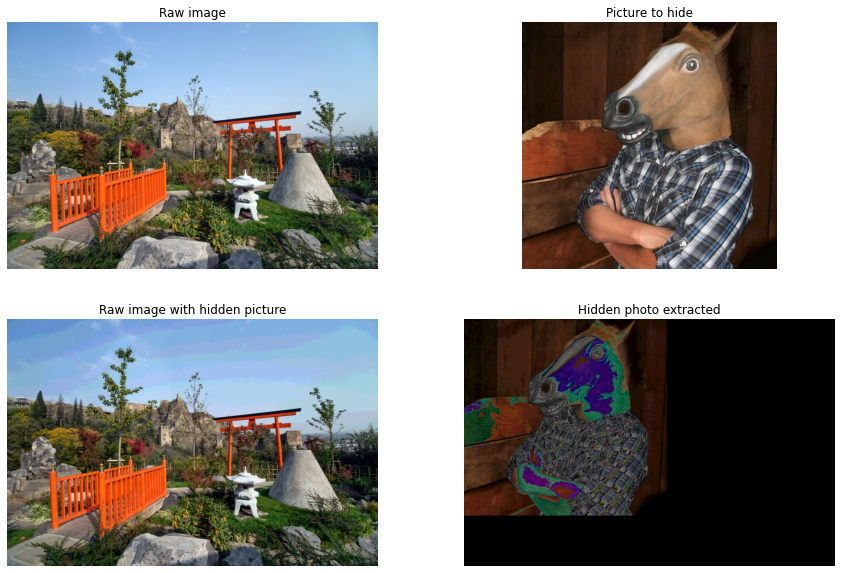

In [5]:
fig = plt.figure(figsize=(15, 10))
fig.add_subplot(2, 2, 1)
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Raw image")
fig.add_subplot(2, 2, 2)
plt.imshow(cv.cvtColor(img_to_hide, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Picture to hide")
fig.add_subplot(2, 2, 3)
plt.imshow(cv.cvtColor(enriched, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Raw image with hidden picture")
fig.add_subplot(2, 2, 4)
plt.imshow(cv.cvtColor(decyphered, cv.COLOR_BGR2RGB))
plt.axis('off')
plt.title("Hidden photo extracted")
plt.show()